In [62]:
import os

import torch
import easyocr
import cv2
import numpy as np
from matplotlib import pyplot as plt

if torch.cuda.is_available():
    reader = easyocr.Reader(['en'], gpu=True)
    print(f"GPU in use: {torch.cuda.get_device_name(0)}")

else:
    reader = easyocr.Reader(['en'], gpu=False)
    print("using CPU, CUDA not available")

GPU in use: NVIDIA GeForce RTX 4060 Laptop GPU


In [65]:
IMAGE_PATH = (r"C:\Users\aidan\OneDrive\Desktop\Robotics\easyocr\images\329_3.webp")

In [66]:
result = reader.readtext(IMAGE_PATH)
result

[([[111, 87], [135, 87], [135, 103], [111, 103]], '420', 0.9998986895288848),
 ([[824, 180], [868, 180], [868, 204], [824, 204]],
  '~Robotin',
  0.10327223300374895),
 ([[506, 196], [594, 196], [594, 224], [506, 224]],
  'ZEBRA',
  0.6003915486197653),
 ([[240, 272], [280, 272], [280, 300], [240, 300]], 'Nu', 0.38398637501223076),
 ([[243, 303], [279, 303], [279, 317], [243, 317]],
  'ZEBRA',
  0.9729366708088615),
 ([[471, 535], [587, 535], [587, 597], [471, 597]], '329', 0.9999708180385114),
 ([[497.1401328392153, 234.19427896235214],
   [547.9683666479474, 241.64569400336947],
   [545.8598671607847, 258.80572103764786],
   [494.0316333520526, 251.35430599663053]],
  'Clippard',
  0.32206974715749115),
 ([[81.21114561800017, 377.1055728090001],
   [118.63101428947043, 368.84250598811775],
   [121.78885438199983, 383.8944271909999],
   [84.36898571052957, 393.15749401188225]],
  'ZEBRA',
  0.2752255974634362)]

discarding: ~Robotin
discarding: ZEBRA
discarding: Nu
discarding: ZEBRA
discarding: Clippard
discarding: ZEBRA
final length: 2


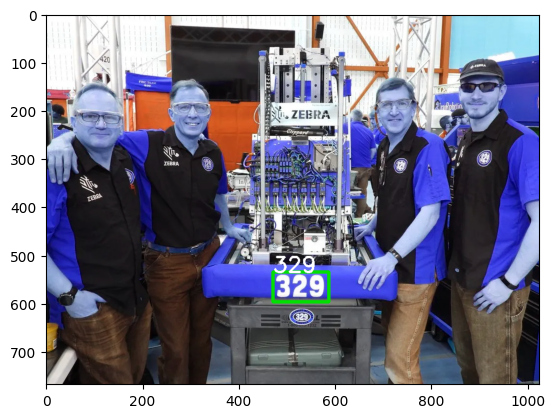

In [72]:
#Change to view different labeled parts
index_view = 1


bottom_right_list = list()
top_left_list = list()
index_list = list()
answer_list = list()

if not result:
    print("Empty Results List")

else:
    for index, item in enumerate(result):
        if result[index][1].isdigit():
            bottom_right_list.append(tuple(result[index][0][2]))
            top_left_list.append(tuple(result[index][0][0]))
            answer_list.append(result[index][1])
        else:
            print(f"discarding: {result[index][1]}")

print(f"final length: {len(answer_list)}")

font = cv2.FONT_HERSHEY_SIMPLEX

img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img, tuple(map(int, top_left_list[index_view])), tuple(map(int, bottom_right_list[index_view])), (0, 225, 0), 5)
img = cv2.putText(img, answer_list[index_view], tuple(map(int, top_left_list[index_view])), font, 1.5, (255, 255, 255), 3)
plt.imshow(img)
plt.show()

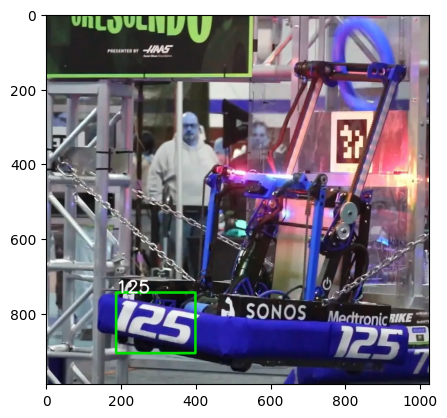

In [40]:
map(int, top_left_list[2])

In [34]:
top_left_list[1]

(758, 818)